In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
# HOLISTIC USED TO EXTRACT KEY POINTS AND DRAWING USED TO DRAW KEY POINTS OF OUR GESTURE
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

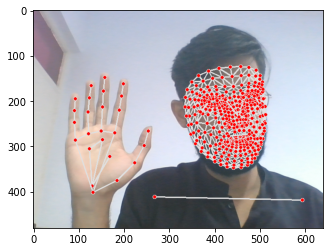

In [9]:
#drawing landmarks 
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [7]:
    cap.release()
    cv2.destroyAllWindows()

In [24]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
face = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    face.append(test)

In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [26]:
result_test = extract_keypoints(results)
result_test
#face

[array([ 0.61816519,  0.72610068, -0.02472191,  0.        ]),
 array([ 0.61925405,  0.6744619 , -0.0517887 ,  0.        ]),
 array([ 0.61634368,  0.6885674 , -0.02584069,  0.        ]),
 array([ 0.60524541,  0.62389982, -0.04246067,  0.        ]),
 array([ 0.61897033,  0.65924323, -0.05578208,  0.        ]),
 array([ 0.61676264,  0.63843024, -0.052708  ,  0.        ]),
 array([ 0.60964358,  0.58747941, -0.02860945,  0.        ]),
 array([ 0.53058624,  0.58686322, -0.00235713,  0.        ]),
 array([ 0.60646236,  0.55108899, -0.02383809,  0.        ]),
 array([ 0.60579288,  0.53112024, -0.02687472,  0.        ]),
 array([ 0.60027331,  0.46287137, -0.02001293,  0.        ]),
 array([ 0.61838257,  0.73328745, -0.02277713,  0.        ]),
 array([ 0.61796701,  0.73801976, -0.01913215,  0.        ]),
 array([ 0.61719447,  0.73934698, -0.01444519,  0.        ]),
 array([ 0.61794889,  0.74081296, -0.01323006,  0.        ]),
 array([ 0.61860889,  0.7465781 , -0.01457603,  0.        ]),
 array([

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['nothing','hello', 'thanks', 'ok', 'bad', 'victory'])
    
# Twenty(20) videos worth of data
no_sequences = 10

# Videos are going to be 20 frames in length
sequence_length = 10

In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [149]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


In [12]:
cap.release()
cv2.destroyAllWindows()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [30]:
# split data = test_split and to_categorical used to converted into a numpy array or matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
#enumerate tells how many different iterations have occured
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'nothing': 0, 'hello': 1, 'thanks': 2, 'ok': 3, 'bad': 4, 'victory': 5}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [33]:
np.array(sequences).shape

(60, 10, 1662)

In [34]:
y = to_categorical(labels).astype(int)
X = np.array(sequences)
X.shape

(60, 10, 1662)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(3, 6)

In [37]:
np.array(labels).shape

(60,)

In [38]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [40]:
res = [.7, 0.2, 0.1]
actions[np.argmax(res)]

'nothing'

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=1200, callbacks=[tb_callback])

Epoch 1/1200
2/2 [==============================] - 5s 67ms/step - loss: 1.8207 - categorical_accuracy: 0.1930
Epoch 2/1200
2/2 [==============================] - 0s 68ms/step - loss: 1.8122 - categorical_accuracy: 0.1053
Epoch 3/1200
2/2 [==============================] - 0s 66ms/step - loss: 1.8448 - categorical_accuracy: 0.1053
Epoch 4/1200
2/2 [==============================] - 0s 62ms/step - loss: 1.8139 - categorical_accuracy: 0.1579
Epoch 5/1200
2/2 [==============================] - 0s 68ms/step - loss: 1.7843 - categorical_accuracy: 0.1754
Epoch 6/1200
2/2 [==============================] - 0s 72ms/step - loss: 1.7921 - categorical_accuracy: 0.1754
Epoch 7/1200
2/2 [==============================] - 0s 70ms/step - loss: 1.7852 - categorical_accuracy: 0.1579
Epoch 8/1200
2/2 [==============================] - 0s 57ms/step - loss: 1.7782 - categorical_accuracy: 0.1579
Epoch 9/1200
2/2 [==============================] - 0s 74ms/step - loss: 1.7663 - categorical_accuracy: 0.1579
E

2/2 [==============================] - 0s 74ms/step - loss: 0.8337 - categorical_accuracy: 0.5263
Epoch 75/1200
2/2 [==============================] - 0s 60ms/step - loss: 0.8662 - categorical_accuracy: 0.5789
Epoch 76/1200
2/2 [==============================] - 0s 62ms/step - loss: 0.8924 - categorical_accuracy: 0.5965
Epoch 77/1200
2/2 [==============================] - 0s 76ms/step - loss: 0.7811 - categorical_accuracy: 0.5965
Epoch 78/1200
2/2 [==============================] - 0s 65ms/step - loss: 0.8757 - categorical_accuracy: 0.4912
Epoch 79/1200
2/2 [==============================] - 0s 54ms/step - loss: 0.7389 - categorical_accuracy: 0.6491
Epoch 80/1200
2/2 [==============================] - 0s 63ms/step - loss: 0.7886 - categorical_accuracy: 0.6316
Epoch 81/1200
2/2 [==============================] - 0s 63ms/step - loss: 0.6920 - categorical_accuracy: 0.7368
Epoch 82/1200
2/2 [==============================] - 0s 56ms/step - loss: 0.7259 - categorical_accuracy: 0.6667
Epoch 

2/2 [==============================] - 0s 62ms/step - loss: 0.3124 - categorical_accuracy: 0.7895
Epoch 147/1200
2/2 [==============================] - 0s 62ms/step - loss: 0.4027 - categorical_accuracy: 0.8246
Epoch 148/1200
2/2 [==============================] - 0s 55ms/step - loss: 0.3211 - categorical_accuracy: 0.8421
Epoch 149/1200
2/2 [==============================] - 0s 64ms/step - loss: 0.6789 - categorical_accuracy: 0.6842
Epoch 150/1200
2/2 [==============================] - 0s 64ms/step - loss: 0.3697 - categorical_accuracy: 0.8070
Epoch 151/1200
2/2 [==============================] - 0s 63ms/step - loss: 0.3284 - categorical_accuracy: 0.8772
Epoch 152/1200
2/2 [==============================] - 0s 56ms/step - loss: 0.3690 - categorical_accuracy: 0.8421
Epoch 153/1200
2/2 [==============================] - 0s 59ms/step - loss: 0.3946 - categorical_accuracy: 0.7895
Epoch 154/1200
2/2 [==============================] - 0s 63ms/step - loss: 0.2826 - categorical_accuracy: 0.859

2/2 [==============================] - 0s 60ms/step - loss: 0.1426 - categorical_accuracy: 0.9123
Epoch 219/1200
2/2 [==============================] - 0s 55ms/step - loss: 0.1414 - categorical_accuracy: 0.9298
Epoch 220/1200
2/2 [==============================] - 0s 64ms/step - loss: 0.1199 - categorical_accuracy: 0.9825
Epoch 221/1200
2/2 [==============================] - 0s 63ms/step - loss: 0.0902 - categorical_accuracy: 1.0000
Epoch 222/1200
2/2 [==============================] - 0s 56ms/step - loss: 0.0903 - categorical_accuracy: 0.9825
Epoch 223/1200
2/2 [==============================] - 0s 63ms/step - loss: 0.1033 - categorical_accuracy: 0.9649
Epoch 224/1200
2/2 [==============================] - 0s 66ms/step - loss: 0.0753 - categorical_accuracy: 1.0000
Epoch 225/1200
2/2 [==============================] - 0s 64ms/step - loss: 0.1047 - categorical_accuracy: 0.9649
Epoch 226/1200
2/2 [==============================] - 0s 58ms/step - loss: 0.0770 - categorical_accuracy: 0.982

2/2 [==============================] - 0s 60ms/step - loss: 0.6266 - categorical_accuracy: 0.6842
Epoch 291/1200
2/2 [==============================] - 0s 57ms/step - loss: 0.6536 - categorical_accuracy: 0.6667
Epoch 292/1200
2/2 [==============================] - 0s 63ms/step - loss: 0.6763 - categorical_accuracy: 0.6667
Epoch 293/1200
2/2 [==============================] - 0s 60ms/step - loss: 0.5926 - categorical_accuracy: 0.6667
Epoch 294/1200
2/2 [==============================] - 0s 57ms/step - loss: 0.5224 - categorical_accuracy: 0.6667
Epoch 295/1200
2/2 [==============================] - 0s 58ms/step - loss: 0.5248 - categorical_accuracy: 0.6667
Epoch 296/1200
2/2 [==============================] - 0s 61ms/step - loss: 0.5096 - categorical_accuracy: 0.6842
Epoch 297/1200
2/2 [==============================] - 0s 61ms/step - loss: 0.4651 - categorical_accuracy: 0.8772
Epoch 298/1200
2/2 [==============================] - 0s 64ms/step - loss: 0.4204 - categorical_accuracy: 0.894

2/2 [==============================] - 0s 63ms/step - loss: 0.1142 - categorical_accuracy: 0.9474
Epoch 363/1200
2/2 [==============================] - 0s 52ms/step - loss: 0.1020 - categorical_accuracy: 0.9649
Epoch 364/1200
2/2 [==============================] - 0s 52ms/step - loss: 0.0609 - categorical_accuracy: 1.0000
Epoch 365/1200
2/2 [==============================] - 0s 58ms/step - loss: 0.1087 - categorical_accuracy: 0.9825
Epoch 366/1200
2/2 [==============================] - 0s 65ms/step - loss: 0.0560 - categorical_accuracy: 1.0000
Epoch 367/1200
2/2 [==============================] - 0s 56ms/step - loss: 0.1001 - categorical_accuracy: 0.9825
Epoch 368/1200
2/2 [==============================] - 0s 61ms/step - loss: 0.0510 - categorical_accuracy: 1.0000
Epoch 369/1200
2/2 [==============================] - 0s 68ms/step - loss: 0.1060 - categorical_accuracy: 0.9825
Epoch 370/1200
2/2 [==============================] - 0s 62ms/step - loss: 0.0859 - categorical_accuracy: 0.982

2/2 [==============================] - 0s 61ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 435/1200
2/2 [==============================] - 0s 61ms/step - loss: 9.8477e-04 - categorical_accuracy: 1.0000
Epoch 436/1200
2/2 [==============================] - 0s 64ms/step - loss: 9.2962e-04 - categorical_accuracy: 1.0000
Epoch 437/1200
2/2 [==============================] - 0s 59ms/step - loss: 8.8809e-04 - categorical_accuracy: 1.0000
Epoch 438/1200
2/2 [==============================] - 0s 57ms/step - loss: 8.6947e-04 - categorical_accuracy: 1.0000
Epoch 439/1200
2/2 [==============================] - 0s 59ms/step - loss: 8.4715e-04 - categorical_accuracy: 1.0000
Epoch 440/1200
2/2 [==============================] - 0s 66ms/step - loss: 8.2252e-04 - categorical_accuracy: 1.0000
Epoch 441/1200
2/2 [==============================] - 0s 66ms/step - loss: 7.9479e-04 - categorical_accuracy: 1.0000
Epoch 442/1200
2/2 [==============================] - 0s 56ms/step - loss: 7.6743e-

2/2 [==============================] - 0s 51ms/step - loss: 2.4519e-04 - categorical_accuracy: 1.0000
Epoch 505/1200
2/2 [==============================] - 0s 66ms/step - loss: 2.4167e-04 - categorical_accuracy: 1.0000
Epoch 506/1200
2/2 [==============================] - 0s 65ms/step - loss: 2.3915e-04 - categorical_accuracy: 1.0000
Epoch 507/1200
2/2 [==============================] - 0s 60ms/step - loss: 2.3618e-04 - categorical_accuracy: 1.0000
Epoch 508/1200
2/2 [==============================] - 0s 56ms/step - loss: 2.3301e-04 - categorical_accuracy: 1.0000
Epoch 509/1200
2/2 [==============================] - 0s 73ms/step - loss: 2.2985e-04 - categorical_accuracy: 1.0000
Epoch 510/1200
2/2 [==============================] - 0s 66ms/step - loss: 2.2729e-04 - categorical_accuracy: 1.0000
Epoch 511/1200
2/2 [==============================] - 0s 67ms/step - loss: 2.2444e-04 - categorical_accuracy: 1.0000
Epoch 512/1200
2/2 [==============================] - 0s 61ms/step - loss: 2.21

2/2 [==============================] - 0s 62ms/step - loss: 1.1600e-04 - categorical_accuracy: 1.0000
Epoch 575/1200
2/2 [==============================] - 0s 62ms/step - loss: 1.1479e-04 - categorical_accuracy: 1.0000
Epoch 576/1200
2/2 [==============================] - 0s 65ms/step - loss: 1.1394e-04 - categorical_accuracy: 1.0000
Epoch 577/1200
2/2 [==============================] - 0s 65ms/step - loss: 1.1292e-04 - categorical_accuracy: 1.0000
Epoch 578/1200
2/2 [==============================] - 0s 60ms/step - loss: 1.1190e-04 - categorical_accuracy: 1.0000
Epoch 579/1200
2/2 [==============================] - 0s 57ms/step - loss: 1.1102e-04 - categorical_accuracy: 1.0000
Epoch 580/1200
2/2 [==============================] - 0s 62ms/step - loss: 1.0999e-04 - categorical_accuracy: 1.0000
Epoch 581/1200
2/2 [==============================] - 0s 60ms/step - loss: 1.0900e-04 - categorical_accuracy: 1.0000
Epoch 582/1200
2/2 [==============================] - 0s 63ms/step - loss: 1.08

2/2 [==============================] - 0s 64ms/step - loss: 6.8345e-05 - categorical_accuracy: 1.0000
Epoch 645/1200
2/2 [==============================] - 0s 57ms/step - loss: 6.7877e-05 - categorical_accuracy: 1.0000
Epoch 646/1200
2/2 [==============================] - 0s 59ms/step - loss: 6.7440e-05 - categorical_accuracy: 1.0000
Epoch 647/1200
2/2 [==============================] - 0s 63ms/step - loss: 6.7070e-05 - categorical_accuracy: 1.0000
Epoch 648/1200
2/2 [==============================] - 0s 59ms/step - loss: 6.6574e-05 - categorical_accuracy: 1.0000
Epoch 649/1200
2/2 [==============================] - 0s 55ms/step - loss: 6.6192e-05 - categorical_accuracy: 1.0000
Epoch 650/1200
2/2 [==============================] - 0s 58ms/step - loss: 6.5701e-05 - categorical_accuracy: 1.0000
Epoch 651/1200
2/2 [==============================] - 0s 62ms/step - loss: 6.5341e-05 - categorical_accuracy: 1.0000
Epoch 652/1200
2/2 [==============================] - 0s 60ms/step - loss: 6.48

2/2 [==============================] - 0s 67ms/step - loss: 4.4736e-05 - categorical_accuracy: 1.0000
Epoch 715/1200
2/2 [==============================] - 0s 57ms/step - loss: 4.4477e-05 - categorical_accuracy: 1.0000
Epoch 716/1200
2/2 [==============================] - 0s 57ms/step - loss: 4.4153e-05 - categorical_accuracy: 1.0000
Epoch 717/1200
2/2 [==============================] - 0s 55ms/step - loss: 4.3897e-05 - categorical_accuracy: 1.0000
Epoch 718/1200
2/2 [==============================] - 0s 59ms/step - loss: 4.3599e-05 - categorical_accuracy: 1.0000
Epoch 719/1200
2/2 [==============================] - 0s 72ms/step - loss: 4.3412e-05 - categorical_accuracy: 1.0000
Epoch 720/1200
2/2 [==============================] - 0s 65ms/step - loss: 4.3134e-05 - categorical_accuracy: 1.0000
Epoch 721/1200
2/2 [==============================] - 0s 59ms/step - loss: 4.2806e-05 - categorical_accuracy: 1.0000
Epoch 722/1200
2/2 [==============================] - 0s 63ms/step - loss: 4.25

2/2 [==============================] - 0s 55ms/step - loss: 2.4035e-05 - categorical_accuracy: 1.0000
Epoch 785/1200
2/2 [==============================] - 0s 55ms/step - loss: 2.3761e-05 - categorical_accuracy: 1.0000
Epoch 786/1200
2/2 [==============================] - 0s 55ms/step - loss: 2.3500e-05 - categorical_accuracy: 1.0000
Epoch 787/1200
2/2 [==============================] - 0s 57ms/step - loss: 2.3253e-05 - categorical_accuracy: 1.0000
Epoch 788/1200
2/2 [==============================] - 0s 55ms/step - loss: 2.2950e-05 - categorical_accuracy: 1.0000
Epoch 789/1200
2/2 [==============================] - 0s 67ms/step - loss: 2.2657e-05 - categorical_accuracy: 1.0000
Epoch 790/1200
2/2 [==============================] - 0s 55ms/step - loss: 2.2385e-05 - categorical_accuracy: 1.0000
Epoch 791/1200
2/2 [==============================] - 0s 59ms/step - loss: 2.2128e-05 - categorical_accuracy: 1.0000
Epoch 792/1200
2/2 [==============================] - 0s 63ms/step - loss: 2.18

2/2 [==============================] - 0s 56ms/step - loss: 5.2221e-06 - categorical_accuracy: 1.0000
Epoch 854/1200
2/2 [==============================] - 0s 65ms/step - loss: 5.1113e-06 - categorical_accuracy: 1.0000
Epoch 855/1200
2/2 [==============================] - 0s 53ms/step - loss: 4.9963e-06 - categorical_accuracy: 1.0000
Epoch 856/1200
2/2 [==============================] - 0s 61ms/step - loss: 4.8666e-06 - categorical_accuracy: 1.0000
Epoch 857/1200
2/2 [==============================] - 0s 64ms/step - loss: 4.7767e-06 - categorical_accuracy: 1.0000
Epoch 858/1200
2/2 [==============================] - 0s 61ms/step - loss: 4.7077e-06 - categorical_accuracy: 1.0000
Epoch 859/1200
2/2 [==============================] - 0s 55ms/step - loss: 4.6031e-06 - categorical_accuracy: 1.0000
Epoch 860/1200
2/2 [==============================] - 0s 65ms/step - loss: 4.4964e-06 - categorical_accuracy: 1.0000
Epoch 861/1200
2/2 [==============================] - 0s 72ms/step - loss: 4.42

2/2 [==============================] - 0s 58ms/step - loss: 1.4598e-06 - categorical_accuracy: 1.0000
Epoch 923/1200
2/2 [==============================] - 0s 61ms/step - loss: 1.4326e-06 - categorical_accuracy: 1.0000
Epoch 924/1200
2/2 [==============================] - 0s 58ms/step - loss: 1.4117e-06 - categorical_accuracy: 1.0000
Epoch 925/1200
2/2 [==============================] - 0s 63ms/step - loss: 1.3950e-06 - categorical_accuracy: 1.0000
Epoch 926/1200
2/2 [==============================] - 0s 76ms/step - loss: 1.3824e-06 - categorical_accuracy: 1.0000
Epoch 927/1200
2/2 [==============================] - 0s 62ms/step - loss: 1.3531e-06 - categorical_accuracy: 1.0000
Epoch 928/1200
2/2 [==============================] - 0s 65ms/step - loss: 1.3343e-06 - categorical_accuracy: 1.0000
Epoch 929/1200
2/2 [==============================] - 0s 62ms/step - loss: 1.3134e-06 - categorical_accuracy: 1.0000
Epoch 930/1200
2/2 [==============================] - 0s 57ms/step - loss: 1.29

2/2 [==============================] - 0s 65ms/step - loss: 5.8559e-07 - categorical_accuracy: 1.0000
Epoch 993/1200
2/2 [==============================] - 0s 66ms/step - loss: 5.8141e-07 - categorical_accuracy: 1.0000
Epoch 994/1200
2/2 [==============================] - 0s 57ms/step - loss: 5.6886e-07 - categorical_accuracy: 1.0000
Epoch 995/1200
2/2 [==============================] - 0s 58ms/step - loss: 5.6467e-07 - categorical_accuracy: 1.0000
Epoch 996/1200
2/2 [==============================] - 0s 58ms/step - loss: 5.6258e-07 - categorical_accuracy: 1.0000
Epoch 997/1200
2/2 [==============================] - 0s 61ms/step - loss: 5.5422e-07 - categorical_accuracy: 1.0000
Epoch 998/1200
2/2 [==============================] - 0s 60ms/step - loss: 5.5213e-07 - categorical_accuracy: 1.0000
Epoch 999/1200
2/2 [==============================] - 0s 59ms/step - loss: 5.4376e-07 - categorical_accuracy: 1.0000
Epoch 1000/1200
2/2 [==============================] - 0s 56ms/step - loss: 5.3

2/2 [==============================] - 0s 66ms/step - loss: 3.2835e-07 - categorical_accuracy: 1.0000
Epoch 1062/1200
2/2 [==============================] - 0s 71ms/step - loss: 3.2207e-07 - categorical_accuracy: 1.0000
Epoch 1063/1200
2/2 [==============================] - 0s 60ms/step - loss: 3.2207e-07 - categorical_accuracy: 1.0000
Epoch 1064/1200
2/2 [==============================] - 0s 164ms/step - loss: 3.1789e-07 - categorical_accuracy: 1.0000
Epoch 1065/1200
2/2 [==============================] - 0s 62ms/step - loss: 3.1580e-07 - categorical_accuracy: 1.0000
Epoch 1066/1200
2/2 [==============================] - 0s 64ms/step - loss: 3.1371e-07 - categorical_accuracy: 1.0000
Epoch 1067/1200
2/2 [==============================] - 0s 62ms/step - loss: 3.0953e-07 - categorical_accuracy: 1.0000
Epoch 1068/1200
2/2 [==============================] - 0s 60ms/step - loss: 3.0953e-07 - categorical_accuracy: 1.0000
Epoch 1069/1200
2/2 [==============================] - 0s 56ms/step - l

2/2 [==============================] - 0s 63ms/step - loss: 2.0914e-07 - categorical_accuracy: 1.0000
Epoch 1131/1200
2/2 [==============================] - 0s 62ms/step - loss: 2.0286e-07 - categorical_accuracy: 1.0000
Epoch 1132/1200
2/2 [==============================] - 0s 59ms/step - loss: 2.0077e-07 - categorical_accuracy: 1.0000
Epoch 1133/1200
2/2 [==============================] - 0s 66ms/step - loss: 2.0286e-07 - categorical_accuracy: 1.0000
Epoch 1134/1200
2/2 [==============================] - 0s 64ms/step - loss: 2.0077e-07 - categorical_accuracy: 1.0000
Epoch 1135/1200
2/2 [==============================] - 0s 61ms/step - loss: 2.0077e-07 - categorical_accuracy: 1.0000
Epoch 1136/1200
2/2 [==============================] - 0s 61ms/step - loss: 2.0077e-07 - categorical_accuracy: 1.0000
Epoch 1137/1200
2/2 [==============================] - 0s 61ms/step - loss: 1.9868e-07 - categorical_accuracy: 1.0000
Epoch 1138/1200
2/2 [==============================] - 0s 61ms/step - lo

2/2 [==============================] - 0s 60ms/step - loss: 1.5267e-07 - categorical_accuracy: 1.0000
Epoch 1200/1200
2/2 [==============================] - 0s 61ms/step - loss: 1.4849e-07 - categorical_accuracy: 1.0000


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 10, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 596,774
Trainable params: 596,774
Non-trai

In [43]:
res = model.predict(X_test)
actions[np.argmax(res[0])]

'victory'

In [29]:
model.save('action.h5')

In [44]:
model.load_weights('action.h5')

In [45]:
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix, accuracy_score

In [46]:
yhat = model.predict(X_test)

In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [44]:
#true label passed and test variables
#confusion_matrix(ytrue, yhat)
#multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 1]],

       [[2, 0],
        [0, 1]],

       [[2, 0],
        [0, 1]]], dtype=int64)

In [48]:
accuracy_score(ytrue, yhat)

1.0

In [49]:
#np.unique(yhat)

In [50]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [56]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-10:]
        
        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        #putText used to draw a text string on any image.
        cv2.putText(image, ' '.join(sentence), (3,30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
victory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
bad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ok
<class 'mediapipe.python.solution_base.S

nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nothing
<class 'mediapipe

KeyboardInterrupt: 

In [57]:
cap.release()
cv2.destroyAllWindows()

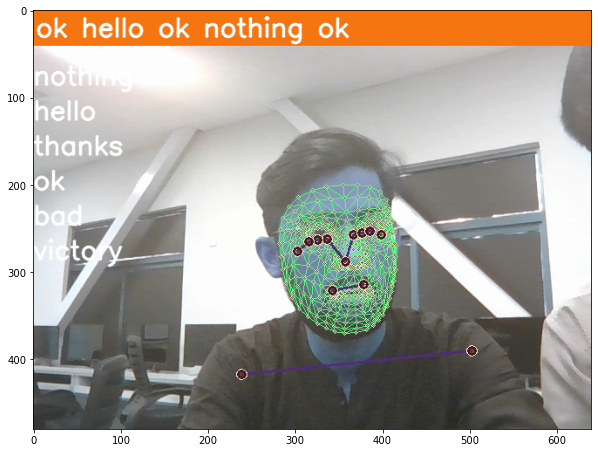

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [51]:
res[np.argmax(res)] > threshold

True

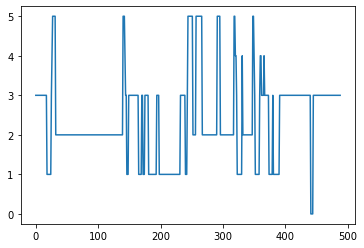

In [52]:
plt.plot(predictions)

In [53]:
predictions[-20:]
#np.unique(predictions[-10:])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]